In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sn
import numpy as np
from scipy.optimize import curve_fit
import ipywidgets as widgets
import ipympl
sn.set()

In [5]:
def func(x, a, b, c):
    return a * pd.np.exp(-b * x) + c


def millions(x, pos):
    return '%1.1fM' % (x * 1e-6)

formatter = FuncFormatter(millions)

In [6]:
def create_week_grid(figure_size):
    fig = plt.figure(constrained_layout=False, figsize=figure_size)
    gs = fig.add_gridspec(3, 2)
    fig_ax1 = fig.add_subplot(gs[0, 0])
    fig_ax1.set_title('Monday')
    f_ax2 = fig.add_subplot(gs[0, 1])
    f_ax2.set_title('Tuesday')
    f_ax3 = fig.add_subplot(gs[1, 0])
    f_ax3.set_title('Wednesday')
    f_ax4 = fig.add_subplot(gs[1, 1])
    f_ax4.set_title('Thursday')
    f_ax5 = fig.add_subplot(gs[-1, 0])
    f_ax5.set_title('Friday')
    f_ax6 = fig.add_subplot(gs[-1, -1])
    f_ax6.set_title('All')
    return fig

def create_scatter_grid(field):
    dic_vkws_pnl = dict()
    fig2 = create_week_grid((12,12))
    xp = np.linspace(-200, 500, 1000)
    for i in range(len(lst_ret)):
        x = df_1500[df_1500.day_name==day_list[i]][[field]] #volume
        y = lst_ret[i] # return
        temp_sn = pd.concat([x, y], axis=1).dropna()
        dic_vkws_pnl[day_list[i]]=temp_sn
        xdata = temp_sn.iloc[:, 0]
        ydata = temp_sn.iloc[:, 1]
        z = np.polyfit(xdata, ydata, 2)
        p = np.poly1d(z)
        popt, pcov = curve_fit(func, xdata, ydata, p0=[1, 0, 1], maxfev=5000)
        sn.regplot(xdata,
                   ydata,
                   ax=fig2.axes[i],
                   scatter_kws={'alpha': 0.25},
                  robust=True)
        g = sn.regplot(xdata,
                   ydata,
                   ax=fig2.axes[-1],
                   scatter_kws={'alpha': 0.25},
                    robust=True)
        l2, = fig2.axes[i].plot(xp, p(xp), 'r-')
        l3, = fig2.axes[i].plot(xp, func(xp, *popt), 'k--')
        fig2.axes[i].set_title(day_list[i])
        fig2.axes[i].legend((l2, l3), ('Quadratic fit', 'Exponential fit'), loc='best', shadow=True)

    plt.setp(fig2.axes, ylim=(-0.075, 0.175))
    plt.setp(g.axes, xlim=(-200,500), ylim=(-0.075, 0.175))
    g.legend(day_list)                     

    plt.tight_layout()
    plt.show()
    return dic_vkws_pnl

In [31]:
import warnings
warnings.filterwarnings('ignore')

In [8]:
df_mt = pd.read_pickle('V:\\VPF\\Systematic Strategies\\VPF - Systematic Rankings\\New Strat\GFG\\option_volume.pkl')
df_full = pd.read_pickle('V:\\VPF\\Systematic Strategies\\VPF - Systematic Rankings\\New Strat\GFG\\portfolio_returns_5D_6D.pkl')

In [9]:
# data generation
df_5d_f = df_full.groupby('Date')[['5d_pnl']].sum()
mondays_f = df_5d_f.asfreq('W-Mon', method='pad')
tuesdays_f = df_5d_f.asfreq('W-Tue', method='pad')
wednesdays_f = df_5d_f.asfreq('W-Wed', method='pad')
thursdays_f = df_5d_f.asfreq('W-Thu', method='pad')
fridays_f = df_5d_f.asfreq('W-Fri', method='pad')

lst_ret = [mondays_f,
           tuesdays_f,
           wednesdays_f,
           thursdays_f,
           fridays_f]

monf = mondays_f.cumsum()
tuef = tuesdays_f.cumsum()
wedf = wednesdays_f.cumsum()
thuf = thursdays_f.cumsum()
frif = fridays_f.cumsum()

df_ret5_f = pd.concat([mondays_f.reset_index()[['5d_pnl']],
                       tuesdays_f.reset_index()[['5d_pnl']],
                       wednesdays_f.reset_index()[['5d_pnl']],
                       thursdays_f.reset_index()[['5d_pnl']],
                       fridays_f.reset_index()[['5d_pnl']]],
                      axis=1)

df_main_f = pd.concat([monf.reset_index()[['5d_pnl']],
                       tuef.reset_index()[['5d_pnl']],
                       wedf.reset_index()[['5d_pnl']],
                       thuf.reset_index()[['5d_pnl']],
                       frif.reset_index()[['5d_pnl']]],
                      axis=1)


df_ret5_f.columns = ['mon', 'tue', 'wed', 'thu', 'fri']
df_main_f.columns = ['mon', 'tue', 'wed', 'thu', 'fri']


# %%
df_6d_f = df_full.groupby('Date')[['6d_pnl']].sum()
fridays_6f = df_6d_f.iloc[3::6, :]
mondays_6f = df_6d_f.iloc[4::6, :]
tuesdays_6f = df_6d_f.iloc[::6, :]
wednesdays_6f = df_6d_f.iloc[1::6, :]
thursdays_6f = df_6d_f.iloc[2::6, :]

lst_ret6 = [mondays_6f,
           tuesdays_6f,
           wednesdays_6f,
           thursdays_6f,
           fridays_6f]

mon6f = mondays_6f.cumsum()
tue6f = tuesdays_6f.cumsum()
wed6f = wednesdays_6f.cumsum()
thu6f = thursdays_6f.cumsum()
fri6f = fridays_6f.cumsum()

df_ret6f = pd.concat([mondays_6f.reset_index()[['6d_pnl']],
                      tuesdays_6f.reset_index()[['6d_pnl']],
                      wednesdays_6f.reset_index()[['6d_pnl']],
                      thursdays_6f.reset_index()[['6d_pnl']],
                      fridays_6f.reset_index()[['6d_pnl']]], axis=1)

df_main6f = pd.concat([mon6f.reset_index()[['6d_pnl']],
                       tue6f.reset_index()[['6d_pnl']],
                       wed6f.reset_index()[['6d_pnl']],
                       thu6f.reset_index()[['6d_pnl']],
                       fri6f.reset_index()[['6d_pnl']]], axis=1)

df_main6f.columns = ['mon', 'tue', 'wed', 'thu', 'fri']
df_ret6f.columns = ['mon', 'tue', 'wed', 'thu', 'fri']

In [10]:
df_opt_volume = df_mt.groupby('Date')[['VWKS', 'VWKS_Call', 'VWKS_Put','VWKS_openInt']].sum()
df_opt_volume.index = pd.to_datetime(df_opt_volume.index)
df_opt_volume['day'] = df_opt_volume.index.dayofweek
df_opt_volume['day_name'] = df_opt_volume.index.day_name()
df_opt_volume['week'] = (df_opt_volume['day'].diff() < 0).cumsum()
df_opt_volume_by_day = df_opt_volume.pivot('week', 'day_name', 'VWKS')

## Results for the option Volume file with not filtering

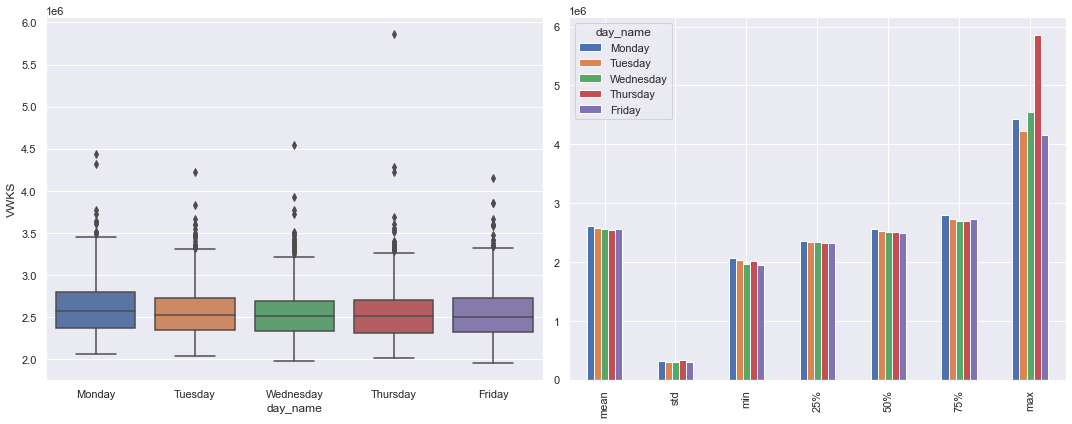

In [28]:
fig, axs = plt.subplots(1,2, figsize=(15,6))
sn.boxplot(data=df_opt_volume, 
           x='day_name', 
           y='VWKS', 
           order=['Monday','Tuesday','Wednesday','Thursday', 'Friday'],
           ax = axs[0]);
df_opt_volume_by_day.describe().drop('count')[
    ['Monday','Tuesday','Wednesday','Thursday', 'Friday']].plot(kind='bar',
                                                               ax=axs[1])
plt.tight_layout()
plt.show()


The charts show how similar volume looks across days of the week. There is not a day that could be label as atypical. If we're trying to extract nuances, then we could argue that Option Volume is the highest at the start of the week and slowly decays throughout the week. Clearly option volume in a vacuum is not of interest to us if we do intersect with the Portofolio performance. 

Therefore, we first repeat the analysis using not the entire dataset but instead the SP1500 basket and then overlap with the Backtested Portfolio Performance

In [12]:
# VWKS data from clarifi is already lagged
df_1500 = pd.read_excel('V:\\VPF\\Systematic Strategies\\VPF - Systematic Rankings\\New Strat\GFG\\vwks_sp1500.xlsx',
                       index_col=0,
                       parse_dates=True)
df_1500.columns = ['VWKS','Call', 'Put', 'Delta']
df_1500.index = pd.to_datetime(df_1500.index)
# this dataset has an empty week that creates a problem with our week counter, so we need
# to remove the date 9/10/2001
df_1500 = df_1500.drop(pd.to_datetime('2001-09-10'))

In [13]:
df_1500['day'] = df_1500.index.dayofweek
df_1500['day_name'] = df_1500.index.day_name()
df_1500['week'] = (df_1500['day'].diff() < 0).cumsum()
df_1500_opt_volume_by_day = df_1500.pivot('week', 'day_name', 'VWKS')

In [14]:
fig, axs = plt.subplots(1,2, figsize=(10,4))
sn.boxplot(data=df_1500, 
           x='day_name', 
           y='VWKS', 
           order=['Monday','Tuesday','Wednesday','Thursday', 'Friday'],
           ax = axs[0]);
df_1500_opt_volume_by_day.describe().drop('count')[
    ['Monday','Tuesday','Wednesday','Thursday', 'Friday']].plot(kind='bar',
                                                               ax=axs[1])
plt.tight_layout()
plt.show()


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

1 3 5 years

Reminder, the VWKS is a volume-weighted average of the normalized K/S ratio, so positive numbers mean bullish expectations (OTM calls 'S<K', or ITM puts) and conversely negative VWKS reflects a more bearish outlook on the stock.

From the bar plots we can clearly see that there's an asymmetry for the VWKS distribution, where the min is much closer to zero than the max. Let's try to see a histogram on the VWKS scores to see in more detail:

In [15]:
fig = create_week_grid((15,15))

day_list = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
for i, d in enumerate(day_list):
    df_1500[df_1500.day_name==d][['VWKS']].plot(kind='hist',
                                                ax=fig.axes[i],
                                                bins=50,
                                                legend=False);
#     ax2 = df_1500[df_1500.day_name==d][['VWKS']].plot.kde(ax=fig.axes[i],
#                                                           secondary_y=True,
#                                                           legend=False)
#     ax2.set_ylim(0)
    fig.axes[i].set_title(d)
    fig.axes[i].set_ylabel('')
df_1500[['VWKS']].plot(kind='hist',
                       ax=fig.axes[-1],
                       bins=50,
                       title='All days',
                       legend=False);
plt.tight_layout()
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

The asymmetry is clearly confirmed on a weekday level and at the general level. We could quantize it with kurthosis but seems like overkill as of now.

Next, we would like to see how the VWKS interacts with our portfolio performance. So we create the joined dataset and explore:

Fist step, Robust OLS using VWKS to explain Performance:

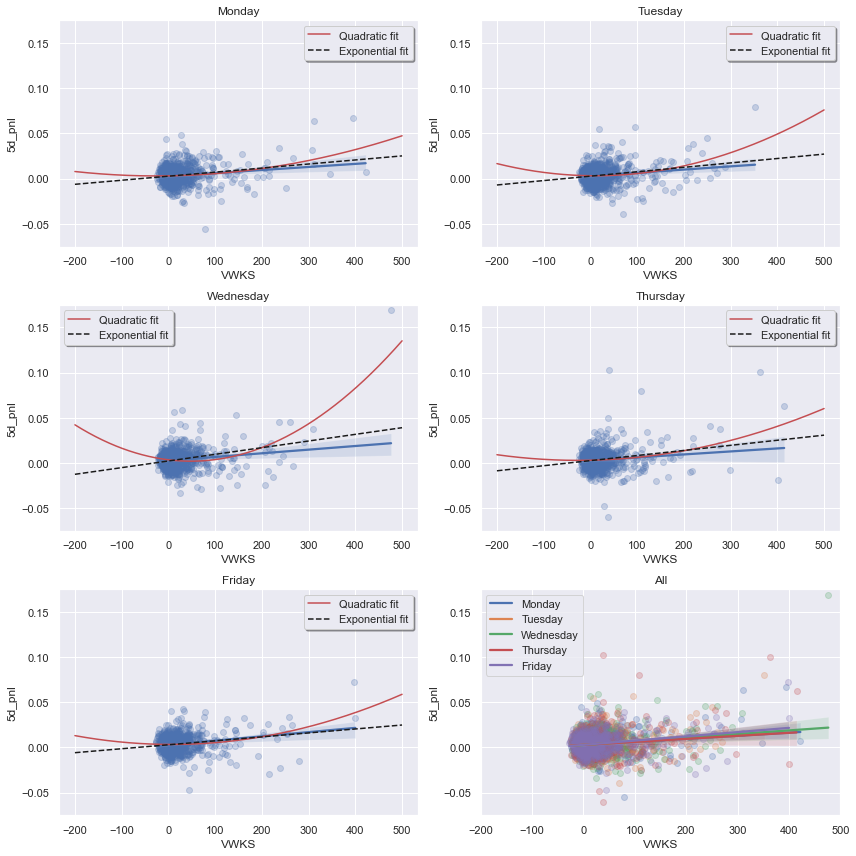

In [32]:
# %% regplots
df_vwks = create_scatter_grid('VWKS')

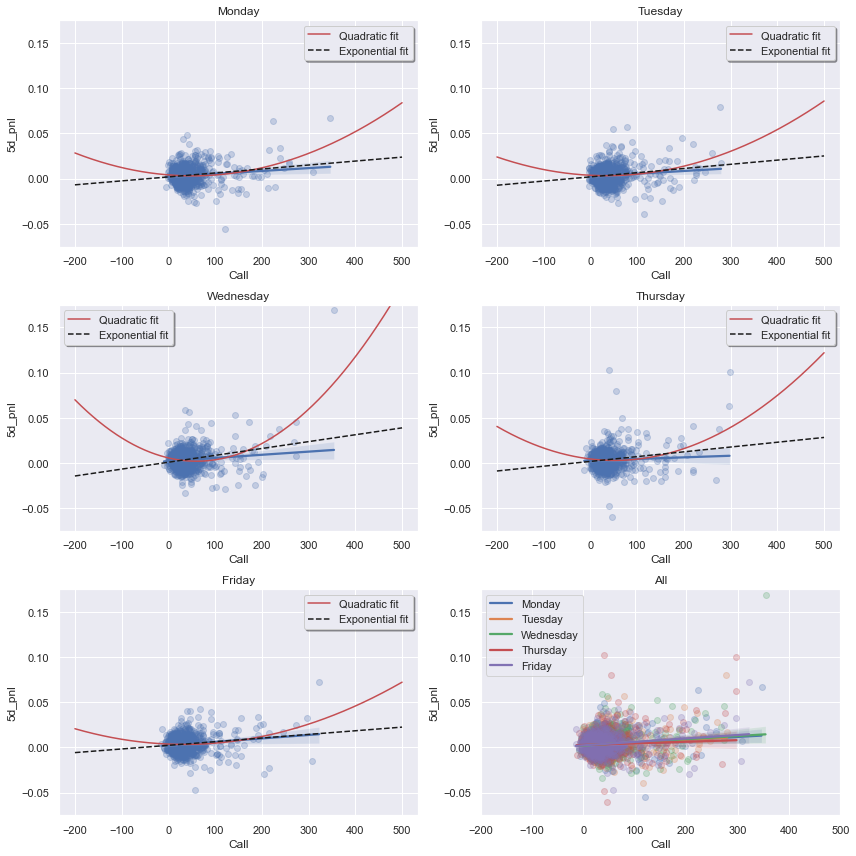

In [33]:
df_call = create_scatter_grid('Call')

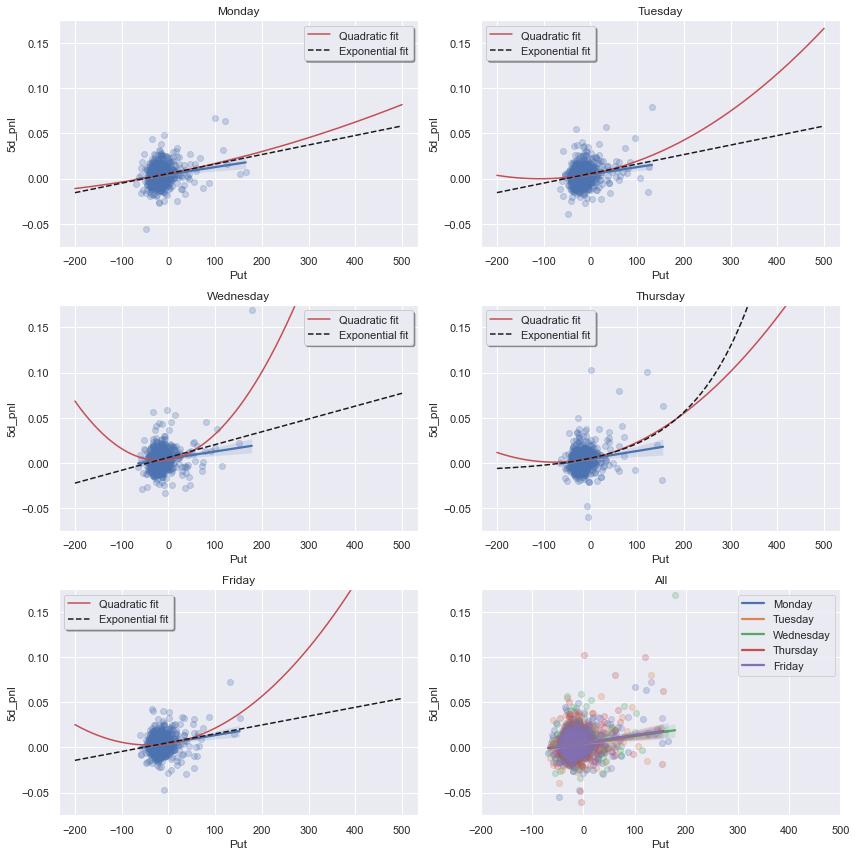

In [34]:
df_put = create_scatter_grid('Put')

### How does the VWKS and 5D pnl averages look by day of the week?

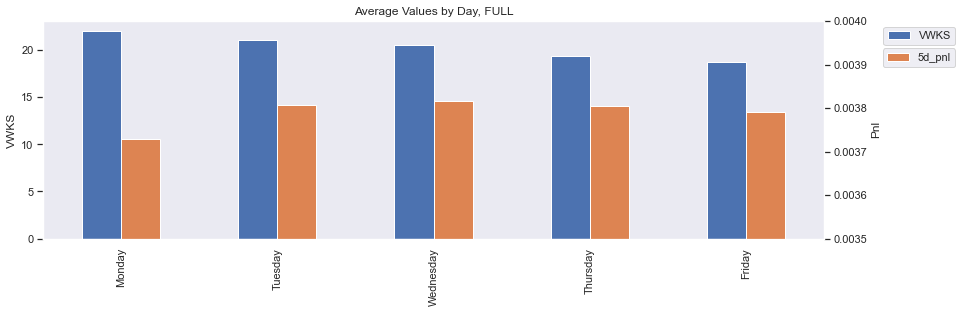

In [19]:
%matplotlib inline
sn.set_style("darkgrid", {'axes.grid' : False})
df_summary = pd.DataFrame.from_dict({ k: v.mean() for k, v in df_vwks.items()})
axs = df_summary.T.plot(kind='bar',
                       secondary_y =['5d_pnl'],
                       figsize=(14,4))
axs.legend(bbox_to_anchor=(1.175,1))
plt.legend(bbox_to_anchor=(1.175,0.9))
axs.set_ylabel('VWKS')
axs.right_ax.set_ylabel('Pnl')
axs.right_ax.set_ylim((0.0035,0.004))
plt.title('Average Values by Day, FULL')
plt.show()
sn.set_style("darkgrid", {'axes.grid' : True})

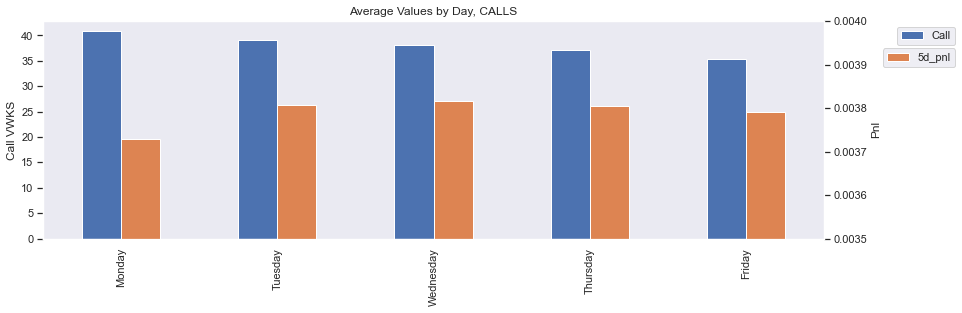

In [20]:
sn.set_style("darkgrid", {'axes.grid' : False})
df_summary = pd.DataFrame.from_dict({ k: v.mean() for k, v in df_call.items()})
axs = df_summary.T.plot(kind='bar',
                       secondary_y =['5d_pnl'],
                       figsize=(14,4))
axs.legend(bbox_to_anchor=(1.175,1))
plt.legend(bbox_to_anchor=(1.175,0.9))
axs.set_ylabel('Call VWKS')
axs.right_ax.set_ylabel('Pnl')
axs.right_ax.set_ylim((0.0035,0.004))
plt.title('Average Values by Day, CALLS')
plt.show()
sn.set_style("darkgrid", {'axes.grid' : True})

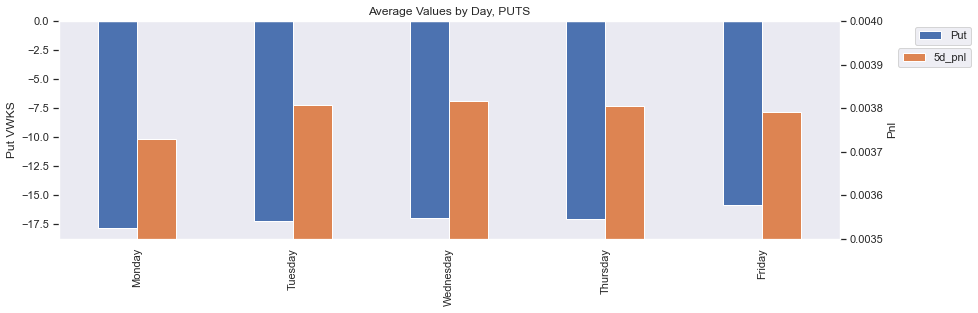

In [21]:
sn.set_style("darkgrid", {'axes.grid' : False})
df_summary = pd.DataFrame.from_dict({ k: v.mean() for k, v in df_put.items()})
axs = df_summary.T.plot(kind='bar',
                       secondary_y =['5d_pnl'],
                       figsize=(14,4))
axs.legend(bbox_to_anchor=(1.175,1))
plt.legend(bbox_to_anchor=(1.175,0.9))
axs.set_ylabel('Put VWKS')
axs.right_ax.set_ylabel('Pnl')
axs.right_ax.set_ylim((0.0035,0.004))
plt.title('Average Values by Day, PUTS')
plt.show()
sn.set_style("darkgrid", {'axes.grid' : True})

In [22]:
out1 = widgets.Output()
out2 = widgets.Output()
out3 = widgets.Output()

tab = widgets.Tab(children = [out1, out2, out3])
tab.set_title(0, 'Full')
tab.set_title(1, 'Call')
tab.set_title(2, 'Put')
data1 = pd.DataFrame(np.random.normal(size = 50))
display(tab)

with out1:
    sn.set_style("darkgrid", {'axes.grid' : False})
    df_summary = pd.DataFrame.from_dict({ k: v.mean() for k, v in df_vwks.items()})
    axs = df_summary.T.plot(kind='bar',
                           secondary_y =['5d_pnl'],
                           figsize=(14,4))
    axs.legend(bbox_to_anchor=(1.175,1))
    plt.legend(bbox_to_anchor=(1.175,0.9))
    axs.set_ylabel('VWKS')
    axs.right_ax.set_ylabel('Pnl')
    axs.right_ax.set_ylim((0.0035,0.004))
    plt.title('Average Values by Day, FULL')
    plt.show()
    

with out2:
    sn.set_style("darkgrid", {'axes.grid' : False})
    df_summary = pd.DataFrame.from_dict({ k: v.mean() for k, v in df_call.items()})
    axs = df_summary.T.plot(kind='bar',
                           secondary_y =['5d_pnl'],
                           figsize=(14,4))
    axs.legend(bbox_to_anchor=(1.175,1))
    plt.legend(bbox_to_anchor=(1.175,0.9))
    axs.set_ylabel('Call VWKS')
    axs.right_ax.set_ylabel('Pnl')
    axs.right_ax.set_ylim((0.0035,0.004))
    plt.title('Average Values by Day, CALLS')
    plt.show()
    sn.set_style("darkgrid", {'axes.grid' : True})
    
with out3:
    sn.set_style("darkgrid", {'axes.grid' : False})
    df_summary = pd.DataFrame.from_dict({ k: abs(v.mean()) for k, v in df_put.items()})
    axs = df_summary.T.plot(kind='bar',
                           secondary_y =['5d_pnl'],
                           figsize=(14,4))
    axs.legend(bbox_to_anchor=(1.175,1))
    plt.legend(bbox_to_anchor=(1.175,0.9))
    axs.set_ylabel('(abs.) Put VWKS')
    axs.right_ax.set_ylabel('Pnl')
    axs.set_ylim((0,18))
    axs.right_ax.set_ylim((0.0035,0.004))
    plt.title('Average Values by Day, PUTS')
    plt.show()
    sn.set_style("darkgrid", {'axes.grid' : True})

## how does it look since feb 2019?

In [24]:
start_date= '2019-02-01'
out1 = widgets.Output()
out2 = widgets.Output()
out3 = widgets.Output()

tab = widgets.Tab(children = [out1, out2, out3])
tab.set_title(0, 'Full')
tab.set_title(1, 'Call')
tab.set_title(2, 'Put')
data1 = pd.DataFrame(np.random.normal(size = 50))
display(tab)

with out1:
    sn.set_style("darkgrid", {'axes.grid' : False})
    df_summary = pd.DataFrame.from_dict({ k: v[start_date:].mean() for k, v in df_vwks.items()})
    axs = df_summary.T.plot(kind='bar',
                           secondary_y =['5d_pnl'],
                           figsize=(14,4))
    axs.legend(bbox_to_anchor=(1.175,1))
    plt.legend(bbox_to_anchor=(1.175,0.9))
    axs.set_ylabel('VWKS')
    axs.right_ax.set_ylabel('Pnl')
#     axs.right_ax.set_ylim((0.0035,0.004))
    plt.title('Average Values by Day, FULL')
    plt.show()
    

with out2:
    sn.set_style("darkgrid", {'axes.grid' : False})
    df_summary = pd.DataFrame.from_dict({ k: v[start_date:].mean() for k, v in df_call.items()})
    axs = df_summary.T.plot(kind='bar',
                           secondary_y =['5d_pnl'],
                           figsize=(14,4))
    axs.legend(bbox_to_anchor=(1.175,1))
    plt.legend(bbox_to_anchor=(1.175,0.9))
    axs.set_ylabel('Call VWKS')
    axs.right_ax.set_ylabel('Pnl')
#     axs.right_ax.set_ylim((0.0035,0.004))
    plt.title('Average Values by Day, CALLS')
    plt.show()
    sn.set_style("darkgrid", {'axes.grid' : True})
    
with out3:
    sn.set_style("darkgrid", {'axes.grid' : False})
    df_summary = pd.DataFrame.from_dict({ k: abs(v[start_date:].mean()) for k, v in df_put.items()})
    axs = df_summary.T.plot(kind='bar',
                           secondary_y =['5d_pnl'],
                           figsize=(14,4))
    axs.legend(bbox_to_anchor=(1.175,1))
    plt.legend(bbox_to_anchor=(1.175,0.9))
    axs.set_ylabel('(abs.) Put VWKS')
    axs.right_ax.set_ylabel('Pnl')
#     axs.set_ylim((0,18))
#     axs.right_ax.set_ylim((0.0035,0.004))
    plt.title('Average Values by Day, PUTS')
    plt.show()
    sn.set_style("darkgrid", {'axes.grid' : True})

In [25]:
start_date= '2017-02-01'
out1 = widgets.Output()
out2 = widgets.Output()
out3 = widgets.Output()

tab = widgets.Tab(children = [out1, out2, out3])
tab.set_title(0, 'Full')
tab.set_title(1, 'Call')
tab.set_title(2, 'Put')
data1 = pd.DataFrame(np.random.normal(size = 50))
display(tab)

with out1:
    sn.set_style("darkgrid", {'axes.grid' : False})
    df_summary = pd.DataFrame.from_dict({ k: v[start_date:].mean() for k, v in df_vwks.items()})
    axs = df_summary.T.plot(kind='bar',
                           secondary_y =['5d_pnl'],
                           figsize=(14,4))
    axs.legend(bbox_to_anchor=(1.175,1))
    plt.legend(bbox_to_anchor=(1.175,0.9))
    axs.set_ylabel('VWKS')
    axs.right_ax.set_ylabel('Pnl')
#     axs.right_ax.set_ylim((0.0035,0.004))
    plt.title('Average Values by Day, FULL')
    plt.show()
    

with out2:
    sn.set_style("darkgrid", {'axes.grid' : False})
    df_summary = pd.DataFrame.from_dict({ k: v[start_date:].mean() for k, v in df_call.items()})
    axs = df_summary.T.plot(kind='bar',
                           secondary_y =['5d_pnl'],
                           figsize=(14,4))
    axs.legend(bbox_to_anchor=(1.175,1))
    plt.legend(bbox_to_anchor=(1.175,0.9))
    axs.set_ylabel('Call VWKS')
    axs.right_ax.set_ylabel('Pnl')
#     axs.right_ax.set_ylim((0.0035,0.004))
    plt.title('Average Values by Day, CALLS')
    plt.show()
    sn.set_style("darkgrid", {'axes.grid' : True})
    
with out3:
    sn.set_style("darkgrid", {'axes.grid' : False})
    df_summary = pd.DataFrame.from_dict({ k: abs(v[start_date:].mean()) for k, v in df_put.items()})
    axs = df_summary.T.plot(kind='bar',
                           secondary_y =['5d_pnl'],
                           figsize=(14,4))
    axs.legend(bbox_to_anchor=(1.175,1))
    plt.legend(bbox_to_anchor=(1.175,0.9))
    axs.set_ylabel('(abs.) Put VWKS')
    axs.right_ax.set_ylabel('Pnl')
#     axs.set_ylim((0,18))
#     axs.right_ax.set_ylim((0.0035,0.004))
    plt.title('Average Values by Day, PUTS')
    plt.show()
    sn.set_style("darkgrid", {'axes.grid' : True})

In [26]:
start_date= '2015-02-01'
out1 = widgets.Output()
out2 = widgets.Output()
out3 = widgets.Output()

tab = widgets.Tab(children = [out1, out2, out3])
tab.set_title(0, 'Full')
tab.set_title(1, 'Call')
tab.set_title(2, 'Put')
data1 = pd.DataFrame(np.random.normal(size = 50))
display(tab)

with out1:
    sn.set_style("darkgrid", {'axes.grid' : False})
    df_summary = pd.DataFrame.from_dict({ k: v[start_date:].mean() for k, v in df_vwks.items()})
    axs = df_summary.T.plot(kind='bar',
                           secondary_y =['5d_pnl'],
                           figsize=(14,4))
    axs.legend(bbox_to_anchor=(1.175,1))
    plt.legend(bbox_to_anchor=(1.175,0.9))
    axs.set_ylabel('VWKS')
    axs.right_ax.set_ylabel('Pnl')
#     axs.right_ax.set_ylim((0.0035,0.004))
    plt.title('Average Values by Day, FULL')
    plt.show()
    

with out2:
    sn.set_style("darkgrid", {'axes.grid' : False})
    df_summary = pd.DataFrame.from_dict({ k: v[start_date:].mean() for k, v in df_call.items()})
    axs = df_summary.T.plot(kind='bar',
                           secondary_y =['5d_pnl'],
                           figsize=(14,4))
    axs.legend(bbox_to_anchor=(1.175,1))
    plt.legend(bbox_to_anchor=(1.175,0.9))
    axs.set_ylabel('Call VWKS')
    axs.right_ax.set_ylabel('Pnl')
#     axs.right_ax.set_ylim((0.0035,0.004))
    plt.title('Average Values by Day, CALLS')
    plt.show()
    sn.set_style("darkgrid", {'axes.grid' : True})
    
with out3:
    sn.set_style("darkgrid", {'axes.grid' : False})
    df_summary = pd.DataFrame.from_dict({ k: abs(v[start_date:].mean()) for k, v in df_put.items()})
    axs = df_summary.T.plot(kind='bar',
                           secondary_y =['5d_pnl'],
                           figsize=(14,4))
    axs.legend(bbox_to_anchor=(1.175,1))
    plt.legend(bbox_to_anchor=(1.175,0.9))
    axs.set_ylabel('(abs.) Put VWKS')
    axs.right_ax.set_ylabel('Pnl')
#     axs.set_ylim((0,18))
#     axs.right_ax.set_ylim((0.0035,0.004))
    plt.title('Average Values by Day, PUTS')
    plt.show()
    sn.set_style("darkgrid", {'axes.grid' : True})

In [27]:
start_date= '2020-06-01'
out1 = widgets.Output()
out2 = widgets.Output()
out3 = widgets.Output()

tab = widgets.Tab(children = [out1, out2, out3])
tab.set_title(0, 'Full')
tab.set_title(1, 'Call')
tab.set_title(2, 'Put')
data1 = pd.DataFrame(np.random.normal(size = 50))
display(tab)

with out1:
    sn.set_style("darkgrid", {'axes.grid' : False})
    df_summary = pd.DataFrame.from_dict({ k: v[start_date:].mean() for k, v in df_vwks.items()})
    axs = df_summary.T.plot(kind='bar',
                           secondary_y =['5d_pnl'],
                           figsize=(14,4))
    axs.legend(bbox_to_anchor=(1.175,1))
    plt.legend(bbox_to_anchor=(1.175,0.9))
    axs.set_ylabel('VWKS')
    axs.right_ax.set_ylabel('Pnl')
#     axs.right_ax.set_ylim((0.0035,0.004))
    plt.title('Average Values by Day, FULL')
    plt.show()
    

with out2:
    sn.set_style("darkgrid", {'axes.grid' : False})
    df_summary = pd.DataFrame.from_dict({ k: v[start_date:].mean() for k, v in df_call.items()})
    axs = df_summary.T.plot(kind='bar',
                           secondary_y =['5d_pnl'],
                           figsize=(14,4))
    axs.legend(bbox_to_anchor=(1.175,1))
    plt.legend(bbox_to_anchor=(1.175,0.9))
    axs.set_ylabel('Call VWKS')
    axs.right_ax.set_ylabel('Pnl')
#     axs.right_ax.set_ylim((0.0035,0.004))
    plt.title('Average Values by Day, CALLS')
    plt.show()
    sn.set_style("darkgrid", {'axes.grid' : True})
    
with out3:
    sn.set_style("darkgrid", {'axes.grid' : False})
    df_summary = pd.DataFrame.from_dict({ k: abs(v[start_date:].mean()) for k, v in df_put.items()})
    axs = df_summary.T.plot(kind='bar',
                           secondary_y =['5d_pnl'],
                           figsize=(14,4))
    axs.legend(bbox_to_anchor=(1.175,1))
    plt.legend(bbox_to_anchor=(1.175,0.9))
    axs.set_ylabel('(abs.) Put VWKS')
    axs.right_ax.set_ylabel('Pnl')
#     axs.set_ylim((0,18))
#     axs.right_ax.set_ylim((0.0035,0.004))
    plt.title('Average Values by Day, PUTS')
    plt.show()
    sn.set_style("darkgrid", {'axes.grid' : True})